# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [2]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Jiayi
[nltk_data]     Gao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jiayi
[nltk_data]     Gao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jiayi
[nltk_data]     Gao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape

df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [4]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64
0


In [5]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [6]:
# Lowercase all words
def make_lower(a_string):
    return a_string.lower()

a_sentence = 'This was A SENTENCE with lower and UPPER CASE.'
make_lower(a_sentence)

'this was a sentence with lower and upper case.'

In [7]:
# Remove all punctuation

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string


a_sentence = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(a_sentence)

'This is a sentence 50 With lots of punctuation  other things'

In [8]:
def remove_bad_characters(a_string):
    new_string=re.sub('[^a-zA-Z0-9]',' ',a_string)
    cleaned_string=re.sub('\s+',' ',new_string)
    return cleaned_string


remove_bad_characters(a_sentence)

'This is a sentence 50 With lots of punctuation other things '

In [9]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = remove_stopwords(input_string)
    #input_string = lem_with_pos_tag(input_string)
    #input_string = remove_stopwords(input_string)    
    return input_string


# df['message_clean'] = df['message']
# df['message_clean'] = df['message_clean'].apply(make_lower)
# df['message_clean'] = df['message_clean'].apply(remove_punctuation)
# df['message_clean'] = df['message_clean'].apply(lem_with_pos_tag)
# df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df['message_clean'] = df['message'].apply(text_pipeline)

print("ORIGINAL TEXT:\n", df['message'][0])
print('-'*999)
print("CLEANDED TEXT:\n", df['message_clean'][0])

test_string = 'I played and started playing with players and we all love to play with plays'


ORIGINAL TEXT:
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [11]:
# 0. Define your `X` and `y` data. 


X = df['message_clean']

y = df['topic_category']

In [13]:
# 1. Train test split your data.

# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y)

In [22]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [23]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)



TfidfVectorizer()

In [24]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [25]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X_train.shape)

(9051, 119473)


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [26]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=.05)




In [27]:
# Fit our model with our training data.


model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [28]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)


In [29]:
# 2. Print the accuracy of the model. 

accuracy = model.score(X_test,y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.909412


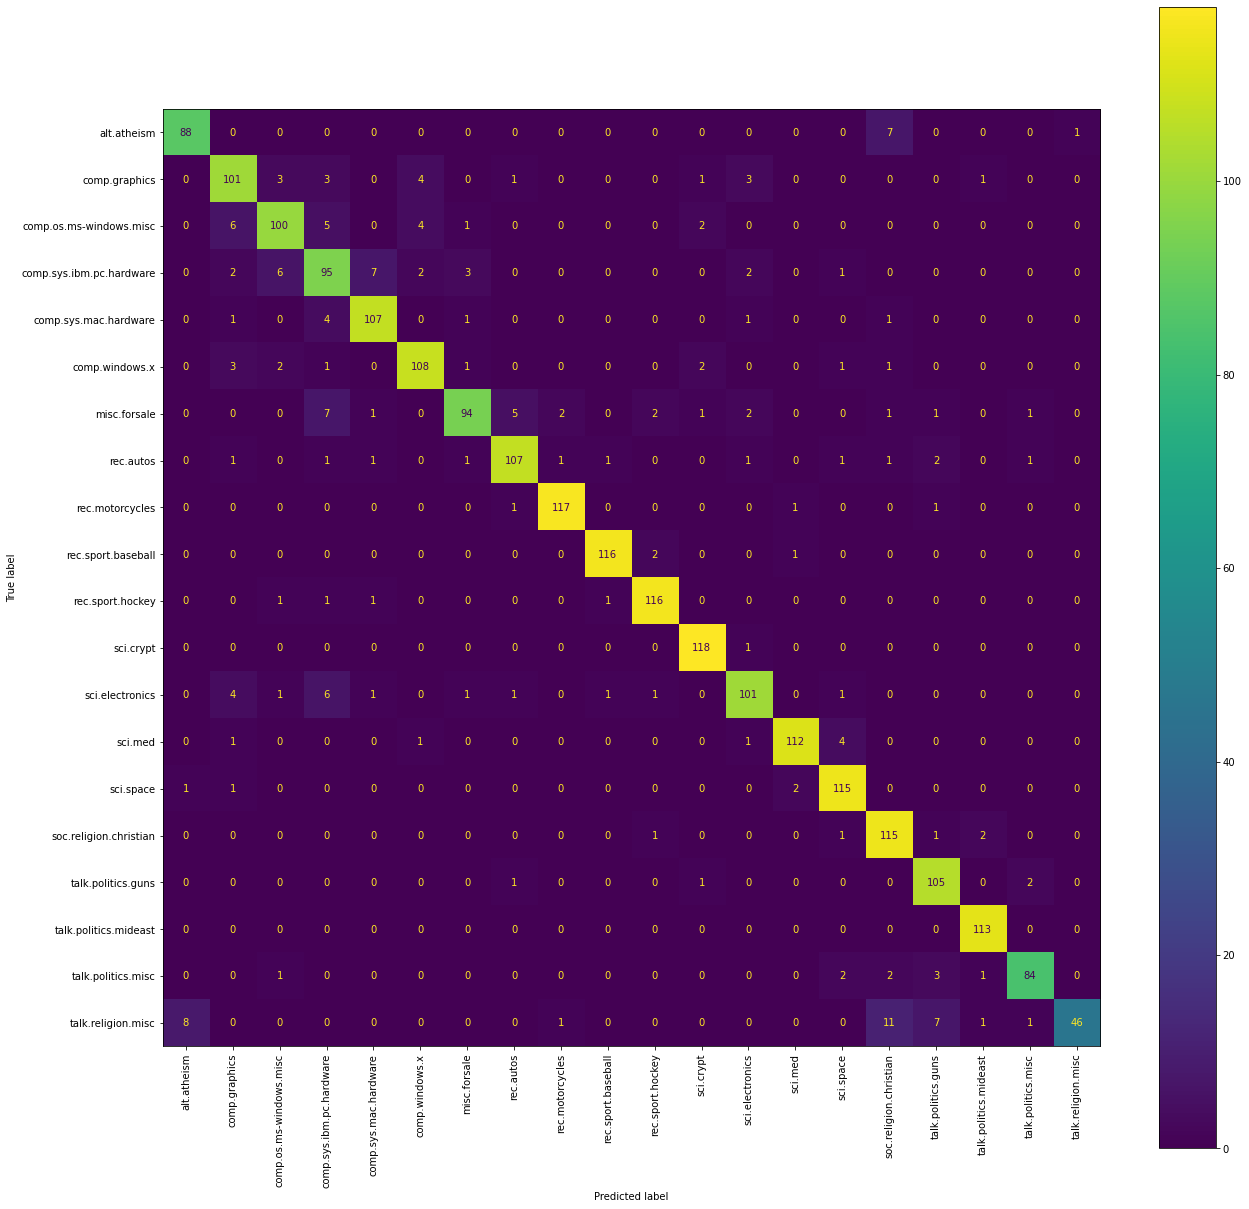

In [30]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);


In [31]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.91      0.92      0.91        96
           comp.graphics       0.84      0.86      0.85       117
 comp.os.ms-windows.misc       0.88      0.85      0.86       118
comp.sys.ibm.pc.hardware       0.77      0.81      0.79       118
   comp.sys.mac.hardware       0.91      0.93      0.92       115
          comp.windows.x       0.91      0.91      0.91       119
            misc.forsale       0.92      0.80      0.86       117
               rec.autos       0.92      0.90      0.91       119
         rec.motorcycles       0.97      0.97      0.97       120
      rec.sport.baseball       0.97      0.97      0.97       119
        rec.sport.hockey       0.95      0.97      0.96       120
               sci.crypt       0.94      0.99      0.97       119
         sci.electronics       0.90      0.86      0.88       118
                 sci.med       0.97      0.94      0.95       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [40]:
my_sentence = 'Let us get prepared, it is almost Black Friday!'

# 1. Apply the text pipeline to your sentence

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

# 3. Use the model to predict your new `X`. 

# 4. Print the prediction


new_text = 'The yankees are winning saturday'


my_sentence = text_pipeline(my_sentence)

# Sanity check
print(my_sentence)

vectorized = vectorizer.transform([my_sentence])

model.predict(vectorized)

let us get prepared it is almost black friday


array(['soc.religion.christian'], dtype='<U24')

In [38]:
pp = model.predict_proba(vectorized)
# Print probabilities for that predicition
for class_name, percentage in zip(model.classes_, pp.round(3)[0]):
    print(class_name, percentage )


alt.atheism 0.033
comp.graphics 0.022
comp.os.ms-windows.misc 0.014
comp.sys.ibm.pc.hardware 0.024
comp.sys.mac.hardware 0.023
comp.windows.x 0.097
misc.forsale 0.007
rec.autos 0.019
rec.motorcycles 0.048
rec.sport.baseball 0.016
rec.sport.hockey 0.022
sci.crypt 0.282
sci.electronics 0.1
sci.med 0.023
sci.space 0.064
soc.religion.christian 0.037
talk.politics.guns 0.039
talk.politics.mideast 0.082
talk.politics.misc 0.026
talk.religion.misc 0.023


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [61]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

print(df.shape)
df

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


In [62]:
df['tweet_orig']=df['Tweet'].apply(text_pipeline)
df

,Party,Handle,Tweet,tweet_orig
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote to savetheinternet prou...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter haven resident alta ...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted that hurrican...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting with repdarrensoto th...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts on june 1...
...,...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check out my oped on need for end executive ov...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...",yesterday betty amp i had a great time learnin...
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,we are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day of school cobbschools cobbback...


In [63]:
x=df['tweet_orig']
y=df['Party']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=80, stratify=y)

In [65]:
vectorizer = TfidfVectorizer()


In [66]:
vectorizer.fit(X_train)

TfidfVectorizer()

In [67]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape)

(69168, 112370)


In [68]:
model = MultinomialNB(alpha=.05)


In [69]:
model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [70]:
y_pred = model.predict(X_test)
print(y_pred)

accuracy = model.score(X_test,y_test)

print("Model Accuracy: %f" % accuracy)

['Republican' 'Republican' 'Republican' ... 'Republican' 'Democrat'
 'Democrat']
Model Accuracy: 0.809854
